In [48]:
import pandas as pd 
import numpy as np

runs_df = pd.read_csv('lvae_missing.csv')
runs_df

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,args.batch_size,args.beta,...,training_config.no_cuda,training_config.num_epochs,training_config.output_dir,training_config.seed,training_config.shuffle,training_config.steps_predict,test/mean_recon,test/mean_recon_missing,test/std_recon,test/std_recon_missing
0,youthful-meadow-4,finished,-,clementchadebec,NaN,2022-12-30T11:56:00.000Z,3,NaN,128,1,...,False,200,dummy_output_dir,8,False,50,42.603952,8.514292,0.068061,0.019899
1,upbeat-energy-68,finished,-,clementchadebec,NaN,2022-12-31T14:44:53.000Z,3,NaN,128,1,...,False,200,dummy_output_dir,8,False,50,44.503356,8.359590,0.051686,0.006135
2,lemon-haze-55,finished,-,clementchadebec,NaN,2022-12-31T14:41:57.000Z,3,NaN,128,1,...,False,200,dummy_output_dir,8,False,50,44.867904,10.114674,0.064473,0.016189
3,zesty-water-90,finished,-,clementchadebec,NaN,2022-12-31T14:49:40.000Z,3,NaN,64,1,...,False,400,dummy_output_dir,8,False,50,27.193388,5.506759,1.987090,4.888332
4,bumbling-night-36,finished,-,clementchadebec,NaN,2022-12-30T12:03:20.000Z,3,NaN,64,1,...,False,400,dummy_output_dir,8,False,50,76.193190,17.138122,59.444385,14.487594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,copper-sound-34,finished,-,clementchadebec,NaN,2022-12-30T12:02:54.000Z,3,NaN,64,1,...,False,400,dummy_output_dir,8,False,50,146.803528,176.415269,47.243756,52.818429
65,decent-salad-54,finished,-,clementchadebec,NaN,2022-12-31T14:41:43.000Z,3,NaN,64,1,...,False,200,dummy_output_dir,8,False,50,283.077554,255.157917,0.005842,0.007662
66,stilted-dream-85,finished,-,clementchadebec,NaN,2022-12-31T14:48:34.000Z,3,NaN,64,1,...,False,200,dummy_output_dir,8,False,50,208.562010,184.275244,8.513745,7.172179
67,ethereal-sunset-88,finished,-,clementchadebec,NaN,2022-12-31T14:49:13.000Z,3,NaN,64,1,...,False,400,dummy_output_dir,8,False,50,187.634879,178.034354,33.222268,23.682261


In [72]:
runs_df['args.input_dim']

0     [1,28,28]
1     [1,28,28]
2     [1,28,28]
3     [1,64,64]
4     [1,64,64]
        ...    
64    [1,64,64]
65    [3,64,64]
66    [3,64,64]
67    [1,64,64]
68    [1,28,28]
Name: args.input_dim, Length: 69, dtype: object

In [87]:
np.prod(np.array(runs_df['args.input_dim'][0][1:-1].split(',')).astype(np.float))

/tmp/ipykernel_67995/3592944110.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.prod(np.array(runs_df['args.input_dim'][0][1:-1].split(',')).astype(np.float))


784.0

In [91]:
metrics_lvae = {
    "sprites": {
        "mean_mse": [],
        "std_mse": []
    },
     "starmen": {
        "mean_mse": [],
        "std_mse": []
    },
     "rotated_mnist": {
        "mean_mse": [],
        "std_mse": []
    },
}

metrics_lvamp = {
    "sprites": {
        "mean_mse": [],
        "std_mse": []
    },
     "starmen": {
        "mean_mse": [],
        "std_mse": []
    },
     "rotated_mnist": {
        "mean_mse": [],
        "std_mse": []
    },
}

metrics_lvae_iaf = {
    "sprites": {
        "mean_mse": [],
        "std_mse": []
    },
     "starmen": {
        "mean_mse": [],
        "std_mse": []
    },
     "rotated_mnist": {
        "mean_mse": [],
        "std_mse": []
    },
}


In [98]:
for dataset in metrics_lvae.keys():
    metrics_lvae[dataset]["mean_mse"] = list(runs_df[runs_df['args.prior']=='standard'][runs_df['args.posterior']=='gaussian'][runs_df['args.dataset'] == dataset]["test/mean_recon"] / np.prod(np.array(runs_df['args.input_dim'][0][1:-1].split(',')).astype(np.float64)))
    metrics_lvae[dataset]["std_mse"] = list(runs_df[runs_df['args.prior']=='standard'][runs_df['args.posterior']=='gaussian'][runs_df['args.dataset'] == dataset]["test/std_recon"] / np.prod(np.array(runs_df['args.input_dim'][0][1:-1].split(',')).astype(np.float64)))
    metrics_lvamp[dataset]["mean_mse"] = list(runs_df[runs_df['args.prior']=='vamp'][runs_df['args.posterior']=='gaussian'][runs_df['args.dataset'] == dataset]["test/mean_recon"] / np.prod(np.array(runs_df['args.input_dim'][0][1:-1].split(',')).astype(np.float64)))
    metrics_lvamp[dataset]["std_mse"] = list(runs_df[runs_df['args.prior']=='vamp'][runs_df['args.posterior']=='gaussian'][runs_df['args.dataset'] == dataset]["test/std_recon"] / np.prod(np.array(runs_df['args.input_dim'][0][1:-1].split(',')).astype(np.float64)))
    metrics_lvae_iaf[dataset]["mean_mse"] = list(runs_df[runs_df['args.prior']=='standard'][runs_df['args.posterior']=='iaf'][runs_df['args.dataset'] == dataset]["test/mean_recon"] / np.prod(np.array(runs_df['args.input_dim'][0][1:-1].split(',')).astype(np.float64)))
    metrics_lvae_iaf[dataset]["std_mse"] = list(runs_df[runs_df['args.prior']=='standard'][runs_df['args.posterior']=='iaf'][runs_df['args.dataset'] == dataset]["test/std_recon"] / np.prod(np.array(runs_df['args.input_dim'][0][1:-1].split(',')).astype(np.float64)))


/tmp/ipykernel_67995/262482365.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metrics_lvae[dataset]["mean_mse"] = list(runs_df[runs_df['args.prior']=='standard'][runs_df['args.posterior']=='gaussian'][runs_df['args.dataset'] == dataset]["test/mean_recon"] / np.prod(np.array(runs_df['args.input_dim'][0][1:-1].split(',')).astype(np.float64)))
/tmp/ipykernel_67995/262482365.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metrics_lvae[dataset]["std_mse"] = list(runs_df[runs_df['args.prior']=='standard'][runs_df['args.posterior']=='gaussian'][runs_df['args.dataset'] == dataset]["test/std_recon"] / np.prod(np.array(runs_df['args.input_dim'][0][1:-1].split(',')).astype(np.float64)))
/tmp/ipykernel_67995/262482365.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  metrics_lvamp[dataset]["mean_mse"] = list(runs_df[runs_df['args.prior']=='vamp'][runs_df['args.posterior']=='gaussian'][runs_df

In [148]:
metrics_lvae['rotated_mnist']

{'mean_mse': [0.05434177558079028,
  0.06911313385348765,
  0.07061164729572394,
  0.07157046413643357,
  0.07046597716544094,
  0.07164632696971139,
  0.07284059785681773,
  0.07285463008668742],
 'std_mse': [8.681222470605523e-05,
  2.3129159878484697e-05,
  4.444517482247245e-05,
  4.3651522823109566e-05,
  2.3413382636071686e-05,
  4.1543578683967985e-05,
  1.907474707523597e-06,
  2.4623823625827804e-06]}

In [145]:
import matplotlib.pyplot as plt
len(metrics_lvae['starmen']['mean_mse'])

7

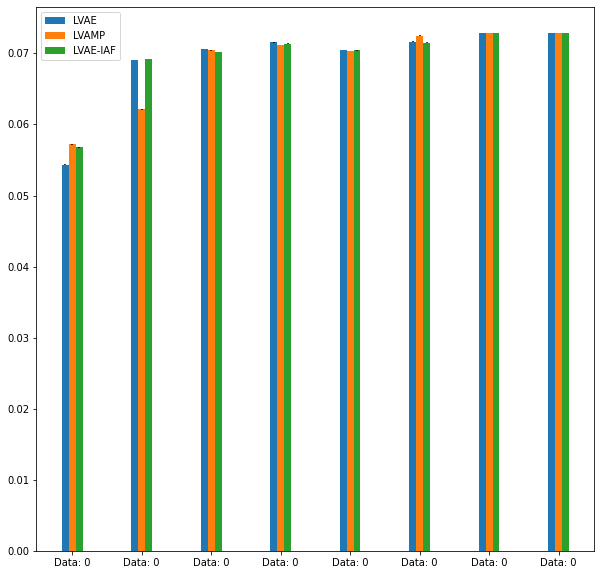

In [161]:
#plt.bar(np.arange(7), metrics_lvae_iaf['sprites']['mean_mse'], yerr=metrics_lvae_iaf['sprites']['std_mse'], width=0.2)
#plt.bar(np.arange(7)-0.2, metrics_lvamp['sprites']['mean_mse'], yerr=metrics_lvae_iaf['sprites']['std_mse'], width=0.2)

x_vals = ['Data: 0']*8

dataset = 'rotated_mnist'

plt.figure(figsize=(10, 10))

plt.bar(np.arange(8), metrics_lvae[dataset]['mean_mse'], yerr=metrics_lvae[dataset]['std_mse'], width=0.1, align='center', label='LVAE')
plt.bar(np.arange(8)+0.1, metrics_lvamp[dataset]['mean_mse'], yerr=metrics_lvamp[dataset]['std_mse'], width=0.1, align='center', label='LVAMP')
plt.bar(np.arange(8)+0.2, metrics_lvae_iaf[dataset]['mean_mse'], yerr=metrics_lvae_iaf[dataset]['std_mse'], width=0.1, align='center', label='LVAE-IAF')

plt.xticks(np.arange(8)+0.1, x_vals)

plt.legend()
plt.show()

In [ ]:
)+0.2, metrics_lvamp['sprites']['mean_mse'], yerr=metrics_lvae_iaf['sprites']['std_mse'], width=0.2)
plt.bar(np.arange(8)+0.4, metrics_lvae['sprites']['mean_mse'], yerr=metrics_lvae_iaf['sprites']['std_mse'], width=0.2)


In [ ]:
ax2.plot(exts, ssim_mean, linestyle='-', marker='x', label='starmen', c=color)
ax2.fill_between(exts, np.array(ssim_mean) - np.array(ssim_std), np.array(ssim_mean) + np.array(ssim_std), alpha=0.2, color=color)

In [46]:
prior = "standard"
posterior = "gaussian"
dataset = "starmen"

mean_mse = []
std_mse = []
prob_missing_data = []
prob_missing_pix = []

for i in range(len(runs_df)):
    if runs_df[i]['posterior'] == posterior and runs_df[i]['prior'] == prior and runs_df[i]['dataset'] == dataset:
        mean_mse.append(runs_df[i]['test/mean_recon'] / np.prod(runs_df.config[['args']['input_dim']))
        std_mse.append(runs_df[i]['test/std_recon'] / np.prod(runs_df.config[i]['args']['input_dim']))
        prob_missing_data.append(runs_df.config[i]['args']['prob_missing_data'])
        prob_missing_pix.append(runs_df.config[i]['args']['prob_missing_pixels'])

AttributeError: 'DataFrame' object has no attribute 'config'

In [42]:
prob_missing_data

[0.5, 0.5, 0.5, 0, 0, 0, 0.7, 0.6, 0.4, 0.2, 0]

In [20]:
runs_df.config[0]['args']

{'beta': 1,
 'prior': 'vamp',
 'warmup': 10,
 'dataset': 'sprites',
 'input_dim': [3, 64, 64],
 'posterior': 'gaussian',
 'use_wandb': True,
 'batch_size': 64,
 'latent_dim': 16,
 'num_epochs': 200,
 'compute_mse': True,
 'compute_nll': False,
 'context_dim': None,
 'steps_saving': None,
 'wandb_entity': 'clementchadebec',
 'learning_rate': 0.001,
 'n_made_blocks': 2,
 'nll_n_samples': 500,
 'steps_predict': 50,
 'wandb_project': 'jz_longitudinal_vaes_missing_data',
 'n_hidden_in_made': 3,
 'prob_missing_data': 0.5,
 'prob_missing_pixels': 0.8,
 'vamp_number_components': 500,
 'linear_scheduling_steps': 0}